In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.chdir("C:\\Users\\Basudev\\Downloads\\Datasets\\datascienceforbusiness-master")

In [2]:
bank = pd.read_csv('bank-full.csv', sep = ';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
bank.shape

(45211, 17)

In [6]:
bank.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [7]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [8]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [9]:
bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
bank['converted'] = bank['y'].apply(lambda x : 0 if x == 'no' else 1)
del bank['y']
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


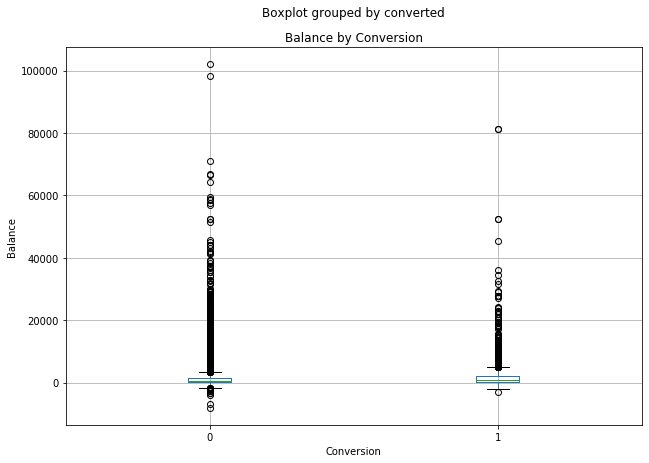

In [11]:
ax = bank[['converted', 'balance']].boxplot(by = 'converted',
                                           showfliers = True,
                                           figsize = (10, 7))
ax.set_xlabel('Conversion')
ax.set_ylabel('Balance')
ax.set_title('Balance by Conversion')
plt.show()

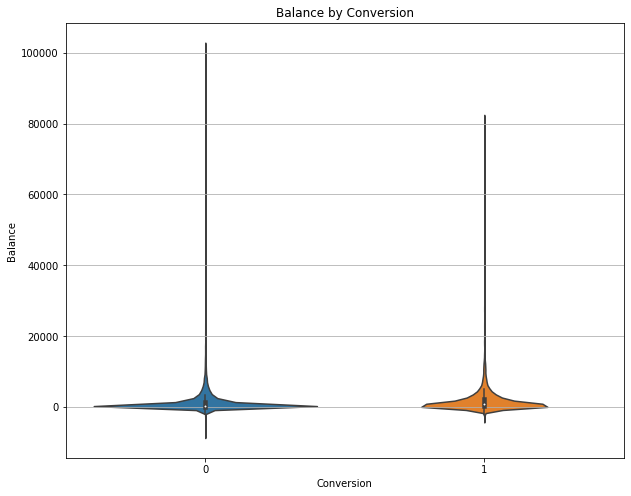

In [12]:
fontsize = 10
fig, axes = plt.subplots()
fig.set_size_inches(10, 8)
sns.violinplot('converted', 'balance', data = bank, ax = axes)
axes.set_title('Balance by Conversion')
axes.yaxis.grid(True)
axes.set_xlabel('Conversion')
axes.set_ylabel('Balance')
plt.show()

In [13]:
bank['campaign'].nunique()

48

In [14]:
conversions_by_contacts = bank.groupby('campaign')['converted'].sum() / bank.groupby('campaign')['converted'].count() * 100
conversions_by_contacts.head()

campaign
1    14.597583
2    11.203519
3    11.193624
4     9.000568
5     7.879819
Name: converted, dtype: float64

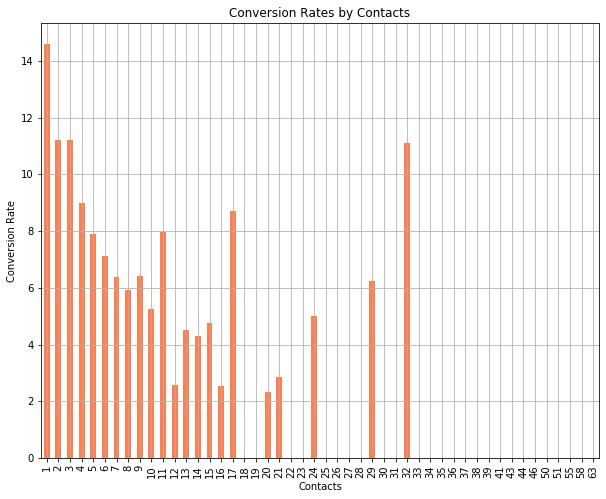

In [15]:
ax = conversions_by_contacts.plot(kind = 'bar',
                                 figsize = (10, 8),
                                 title = 'Conversion Rates by Contacts',
                                 grid = True,
                                 color = 'coral')
ax.set_xlabel("Contacts")
ax.set_ylabel('Conversion Rate')
plt.show()

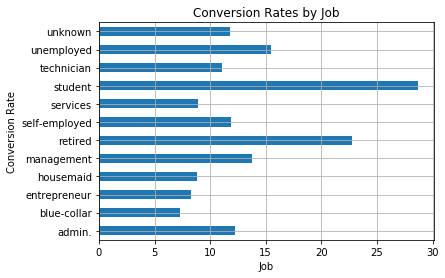

In [16]:
conversions_by_job = bank.groupby('job')['converted'].sum() / bank.groupby('job')['converted'].count() * 100
ax = conversions_by_job.plot(kind = 'barh',
                            title = 'Conversion Rates by Job',
                            grid = True)
ax.set_xlabel('Job')
ax.set_ylabel('Conversion Rate')
plt.show()

In [17]:
bank.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
converted       2
dtype: int64

In [18]:
cols = bank.columns 
num_cols = bank._get_numeric_data().columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['poutcome',
 'marital',
 'job',
 'month',
 'loan',
 'housing',
 'contact',
 'default',
 'education']

In [19]:
bank['month'].unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr', 'sep'], dtype=object)

In [20]:
bank.groupby('month').count()['converted']

month
apr     2932
aug     6247
dec      214
feb     2649
jan     1403
jul     6895
jun     5341
mar      477
may    13766
nov     3970
oct      738
sep      579
Name: converted, dtype: int64

In [21]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
bank['month'] = bank['month'].apply(lambda x: months.index(x) + 1)
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,converted
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,5,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,5,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,5,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,5,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,5,198,1,-1,0,unknown,0


In [22]:
bank['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [23]:
bank = pd.get_dummies(data = bank, columns = ['job'])
bank.head()

,age,marital,education,default,balance,housing,loan,contact,day,month,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,married,tertiary,no,2143,yes,no,unknown,5,5,...,0,0,1,0,0,0,0,0,0,0
1,44,single,secondary,no,29,yes,no,unknown,5,5,...,0,0,0,0,0,0,0,1,0,0
2,33,married,secondary,no,2,yes,yes,unknown,5,5,...,1,0,0,0,0,0,0,0,0,0
3,47,married,unknown,no,1506,yes,no,unknown,5,5,...,0,0,0,0,0,0,0,0,0,0
4,33,single,unknown,no,1,no,no,unknown,5,5,...,0,0,0,0,0,0,0,0,0,1


In [24]:
bank['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [25]:
bank = pd.get_dummies(data = bank, columns = ['education'])
bank.head()

,age,marital,default,balance,housing,loan,contact,day,month,duration,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,58,married,no,2143,yes,no,unknown,5,5,261,...,0,0,0,0,0,0,0,0,1,0
1,44,single,no,29,yes,no,unknown,5,5,151,...,0,0,0,1,0,0,0,1,0,0
2,33,married,no,2,yes,yes,unknown,5,5,76,...,0,0,0,0,0,0,0,1,0,0
3,47,married,no,1506,yes,no,unknown,5,5,92,...,0,0,0,0,0,0,0,0,0,1
4,33,single,no,1,no,no,unknown,5,5,198,...,0,0,0,0,0,1,0,0,0,1


In [26]:
bank['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [27]:
bank = pd.get_dummies(data = bank, columns = ['contact'])
bank.head()

,age,marital,default,balance,housing,loan,day,month,duration,campaign,...,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,married,no,2143,yes,no,5,5,261,1,...,0,0,0,0,0,1,0,0,0,1
1,44,single,no,29,yes,no,5,5,151,1,...,1,0,0,0,1,0,0,0,0,1
2,33,married,no,2,yes,yes,5,5,76,1,...,0,0,0,0,1,0,0,0,0,1
3,47,married,no,1506,yes,no,5,5,92,1,...,0,0,0,0,0,0,1,0,0,1
4,33,single,no,1,no,no,5,5,198,1,...,0,0,1,0,0,0,1,0,0,1


In [28]:
bank['default'].unique()

array(['no', 'yes'], dtype=object)

In [29]:
bank = pd.get_dummies(data = bank, columns = ['default'])
bank.head()

,age,marital,balance,housing,loan,day,month,duration,campaign,pdays,...,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes
0,58,married,2143,yes,no,5,5,261,1,-1,...,0,0,0,1,0,0,0,1,1,0
1,44,single,29,yes,no,5,5,151,1,-1,...,0,0,1,0,0,0,0,1,1,0
2,33,married,2,yes,yes,5,5,76,1,-1,...,0,0,1,0,0,0,0,1,1,0
3,47,married,1506,yes,no,5,5,92,1,-1,...,0,0,0,0,1,0,0,1,1,0
4,33,single,1,no,no,5,5,198,1,-1,...,1,0,0,0,1,0,0,1,1,0


In [30]:
bank = pd.get_dummies(data = bank, columns = ['marital'])
bank.head()

,age,balance,housing,loan,day,month,duration,campaign,pdays,previous,...,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,marital_divorced,marital_married,marital_single
0,58,2143,yes,no,5,5,261,1,-1,0,...,1,0,0,0,1,1,0,0,1,0
1,44,29,yes,no,5,5,151,1,-1,0,...,0,0,0,0,1,1,0,0,0,1
2,33,2,yes,yes,5,5,76,1,-1,0,...,0,0,0,0,1,1,0,0,1,0
3,47,1506,yes,no,5,5,92,1,-1,0,...,0,1,0,0,1,1,0,0,1,0
4,33,1,no,no,5,5,198,1,-1,0,...,0,1,0,0,1,1,0,0,0,1


In [31]:
bank = pd.get_dummies(data = bank, columns = ['housing'])
bank.head()

,age,balance,loan,day,month,duration,campaign,pdays,previous,poutcome,...,contact_cellular,contact_telephone,contact_unknown,default_no,default_yes,marital_divorced,marital_married,marital_single,housing_no,housing_yes
0,58,2143,no,5,5,261,1,-1,0,unknown,...,0,0,1,1,0,0,1,0,0,1
1,44,29,no,5,5,151,1,-1,0,unknown,...,0,0,1,1,0,0,0,1,0,1
2,33,2,yes,5,5,76,1,-1,0,unknown,...,0,0,1,1,0,0,1,0,0,1
3,47,1506,no,5,5,92,1,-1,0,unknown,...,0,0,1,1,0,0,1,0,0,1
4,33,1,no,5,5,198,1,-1,0,unknown,...,0,0,1,1,0,0,0,1,1,0


In [32]:
bank = pd.get_dummies(data = bank, columns = ['loan'])
bank.head()

,age,balance,day,month,duration,campaign,pdays,previous,poutcome,converted,...,contact_unknown,default_no,default_yes,marital_divorced,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes
0,58,2143,5,5,261,1,-1,0,unknown,0,...,1,1,0,0,1,0,0,1,1,0
1,44,29,5,5,151,1,-1,0,unknown,0,...,1,1,0,0,0,1,0,1,1,0
2,33,2,5,5,76,1,-1,0,unknown,0,...,1,1,0,0,1,0,0,1,0,1
3,47,1506,5,5,92,1,-1,0,unknown,0,...,1,1,0,0,1,0,0,1,1,0
4,33,1,5,5,198,1,-1,0,unknown,0,...,1,1,0,0,0,1,1,0,1,0


In [33]:
bank = pd.get_dummies(data = bank, columns = ['poutcome'])
bank.head()

,age,balance,day,month,duration,campaign,pdays,previous,converted,job_admin.,...,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,5,261,1,-1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,44,29,5,5,151,1,-1,0,0,0,...,0,1,0,1,1,0,0,0,0,1
2,33,2,5,5,76,1,-1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,47,1506,5,5,92,1,-1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
4,33,1,5,5,198,1,-1,0,0,0,...,0,1,1,0,1,0,0,0,0,1


In [34]:
Y_train = bank['converted']
X_train = bank.drop(labels = ['converted'], axis = 1)
X_train

,age,balance,day,month,duration,campaign,pdays,previous,job_admin.,job_blue-collar,...,marital_married,marital_single,housing_no,housing_yes,loan_no,loan_yes,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,5,261,1,-1,0,0,0,...,1,0,0,1,1,0,0,0,0,1
1,44,29,5,5,151,1,-1,0,0,0,...,0,1,0,1,1,0,0,0,0,1
2,33,2,5,5,76,1,-1,0,0,0,...,1,0,0,1,0,1,0,0,0,1
3,47,1506,5,5,92,1,-1,0,0,1,...,1,0,0,1,1,0,0,0,0,1
4,33,1,5,5,198,1,-1,0,0,0,...,0,1,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,11,977,3,-1,0,0,0,...,1,0,1,0,1,0,0,0,0,1
45207,71,1729,17,11,456,2,-1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
45208,72,5715,17,11,1127,5,184,3,0,0,...,1,0,1,0,1,0,0,0,1,0
45209,57,668,17,11,508,4,-1,0,0,1,...,1,0,1,0,1,0,0,0,0,1


In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dtc = DecisionTreeClassifier(max_depth = 5)
dtc.fit(X_train, Y_train)
features = list(X_train.columns)
response_var = 'converted'
features

['age',
 'balance',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'contact_cellular',
 'contact_telephone',
 'contact_unknown',
 'default_no',
 'default_yes',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'housing_no',
 'housing_yes',
 'loan_no',
 'loan_yes',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success',
 'poutcome_unknown']

In [47]:
from sklearn.base import clone

def imp_df(column_names, importances):
    df = pd.DataFrame({'feature' : column_names,
                      'feature_importance' : importances}).sort_values('feature_importance', ascending = False).reset_index(drop = True)
    return df

def drop_col_feat_imp(model, X_train, y_train, random_state = 42):
    #clone the model
    model_clone = clone(model)
    model_clone.random_state = random_state
    #training & scoring benchmark model
    model_clone.fit(X_train, y_train)
    benchmark_score = model_clone.score(X_train, y_train)
    #list for storing feature importances
    importances = []
    for col in X_train.columns:
        model_clone = clone(model)
        model_clone.random_state = random_state
        model_clone.fit(X_train.drop(col, axis = 1), y_train)
        drop_col_score = model_clone.score(X_train.drop(col, axis = 1), y_train)
        importances.append(benchmark_score - drop_col_score)
    importances_df = imp_df(X_train.columns, importances)
    return importances_df

In [48]:
drop_col_feat_imp(dtc, X_train, Y_train)

,feature,feature_importance
0,duration,0.009002
1,poutcome_success,0.004711
2,pdays,0.000929
3,month,0.000177
4,marital_married,0.000066
5,day,0.000022
6,education_primary,0.000000
7,marital_single,0.000000
8,education_unknown,0.000000
9,contact_telephone,0.000000
